# Data Analysis: lecture 3

In [ ]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Exploratory Data Analysis: The heart of Data Science Project

<font color='red'>What is done in EDA?</font>

1. We try to understand the main characteristics of the data
2. We visulaize, how the features are related to the target variable
3. We analyze the relationship between features or variables

In [16]:
## Let's start by loading and filling out the missing data

import pandas as pd
import numpy as np
df = pd.read_csv('imports-85.data', header=None)
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers

# replace ? with nan
df.replace('?', np.nan, inplace=True)

#function to fill the missing value

def fillmissing_numeric(table, col_name):
    table[col_name] = table[col_name].astype('float64')
    table[col_name].fillna(table[col_name].mean(), inplace=True)
    
def fillmissing_object(table, col_name):
    table[col_name] = table[col_name].astype('object')
    table[col_name].fillna(table[col_name].value_counts().idxmax(), inplace=True)
    
# fill the numeric values
fillmissing_numeric(df, 'normalized-losses')
fillmissing_numeric(df, 'bore')
fillmissing_numeric(df, 'stroke')
fillmissing_numeric(df, 'horsepower')
fillmissing_numeric(df, 'peak-rpm')
fillmissing_numeric(df, 'stroke')

#fill the categorical values
fillmissing_object(df, 'num-of-doors')

df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

df['price'] = df['price'].astype('float64')

In [17]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


### Descriptive statistics

In [18]:
# We have seen couple of these
df.describe(include='all') #to see all of the statistical description, be it numerical or categorical
# df.describe() #only numerical
# df.describe(include=object) #only categorical

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.00000,201,201,201,201,201,201,201,201.000000,...,201.000000,201,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
unique,NaN,NaN,22,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,181,165,115,94,118,198,NaN,...,NaN,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.840796,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.797015,...,126.875622,NaN,3.330692,3.256874,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353
std,1.254802,31.99625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.066366,...,41.546834,NaN,0.268072,0.316048,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342
min,-2.000000,65.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,98.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000
75%,2.000000,137.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000


In [19]:
#value counts method
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [20]:
df.make.value_counts()

toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
volkswagen       12
subaru           12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
chevrolet         3
jaguar            3
alfa-romero       3
renault           2
isuzu             2
mercury           1
Name: make, dtype: int64

**Boxplots**

One of the strongest methods to visualize the distribution of the data. A boxplot is a graph that gives you a good indication of how the values in the data are spread out. Although boxplots may seem primitive in comparison to a histogram or density plot, they have the advantage of taking up less space, which is useful when comparing distributions between many groups or datasets. -- Medium blog

![](boxplot1.png)

**median (Q2/50th Percentile)**: the middle value of the dataset.

**first quartile (Q1/25th Percentile)**: the middle number between the smallest number (not the “minimum”) and the median of the dataset.

**third quartile (Q3/75th Percentile)**: the middle value between the median and the highest value (not the “maximum”) of the dataset.

**interquartile range (IQR)**: 25th to the 75th percentile.

whiskers (shown in blue)

outliers (shown as green circles)

**maximum**: Q3 + 1.5*IQR

**minimum**: Q1 -1.5*IQR

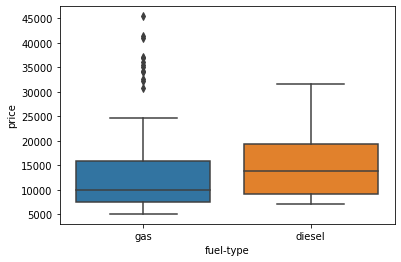

In [21]:
sns.boxplot(x='fuel-type', y='price', data=df)
plt.show()

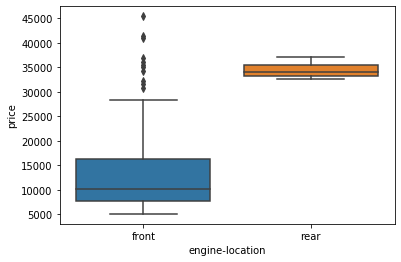

In [22]:
sns.boxplot(x='engine-location', y='price', data=df)
plt.show()

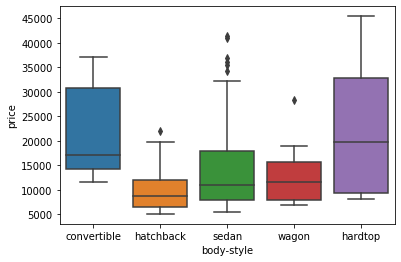

In [23]:
sns.boxplot(x='body-style', y='price', data=df)
plt.show()

**Scatter plot**

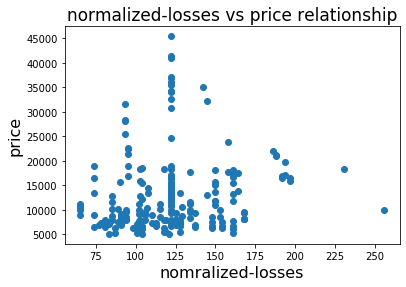

In [24]:
plt.scatter(df['normalized-losses'], df['price'])
plt.title('normalized-losses vs price relationship', fontsize=17)
plt.xlabel('nomralized-losses', fontsize=16)
plt.ylabel('price', fontsize=16)
plt.show()

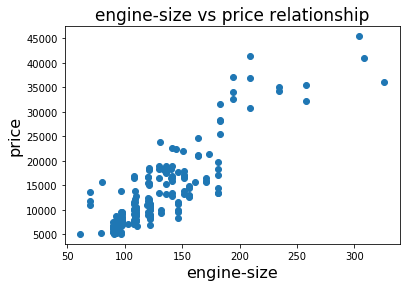

In [25]:
plt.scatter(df['engine-size'], df['price'])
plt.title('engine-size vs price relationship', fontsize=17)
plt.xlabel('engine-size', fontsize=16)
plt.ylabel('price', fontsize=16)
plt.show()

### Grouping and cross-feature relationship

In [26]:
df[['fuel-type', 'price']].groupby('fuel-type').mean()

,price
fuel-type,
diesel,15838.15000
gas,12916.40884


In [27]:
df[['fuel-type', 'drive-wheels', 'price']].groupby(['fuel-type', 'drive-wheels']).mean()

price
fuel-type drive-wheels              
diesel    fwd            9265.333333
          rwd           21215.909091
gas       4wd           10241.000000
          fwd            9243.082569
          rwd           19506.968750

In [28]:
## pivot table
grp = df[['fuel-type', 'drive-wheels', 'price']].groupby(['fuel-type', 'drive-wheels'], as_index=False).mean()
PIVOT_Car = grp.pivot(index='fuel-type', columns='drive-wheels')
PIVOT_Car

price                           
drive-wheels      4wd          fwd           rwd
fuel-type                                       
diesel            NaN  9265.333333  21215.909091
gas           10241.0  9243.082569  19506.968750

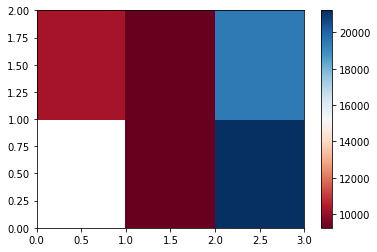

In [29]:
plt.pcolor(PIVOT_Car, cmap='RdBu')
plt.colorbar()
plt.show()

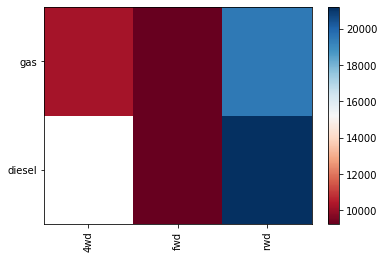

In [31]:
fig, ax = plt.subplots()
im = ax.pcolor(PIVOT_Car, cmap='RdBu')

#label names
row_labels = PIVOT_Car.columns.levels[1]
col_labels = PIVOT_Car.index

#move ticks and labels to the center
ax.set_xticks(np.arange(PIVOT_Car.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(PIVOT_Car.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

# Correlation

Correlation indicates how one variable is related to the other variable. In data science, we wil use correlation to determine how one of the features are related to the other feature or the target variable. 

![](cor_coef.png)

**First, we will discuss about how to comprehend correlation between two continuous variables**.

Eating burger --> getting fat 

raining --> Umbrella

doing party --> spread of COVID-19

**<font color='red'>Correlation doesnot mean causation !!</font>**

Example: Icecream and murder

**Positive and negative and zero correlation:**

years of experience --> salary : positive

Increase of hospital --> death rate : negative

amount of rain in Khulna --> price of iphone : no correlation

In [32]:
#correlation between all the variables
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098267,-0.063561,-0.033956,-0.034636,0.082269


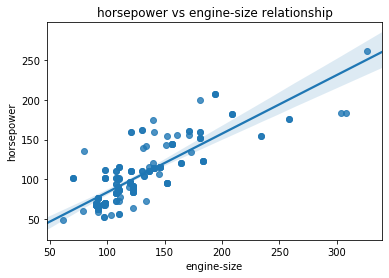

In [33]:
sns.regplot(x="engine-size", y="horsepower", data=df)
plt.title("horsepower vs engine-size relationship")
plt.show()

In [34]:
df["engine-size"].corr(df["horsepower"])

0.8226756460813223

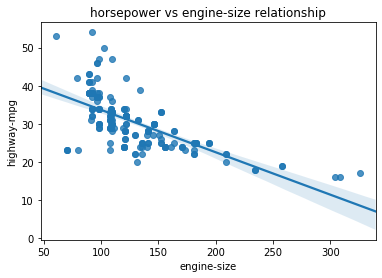

In [35]:
sns.regplot(x="engine-size", y="highway-mpg", data=df)
plt.title("horsepower vs engine-size relationship")
plt.show()

**Our target variable is price, so let us explore that**

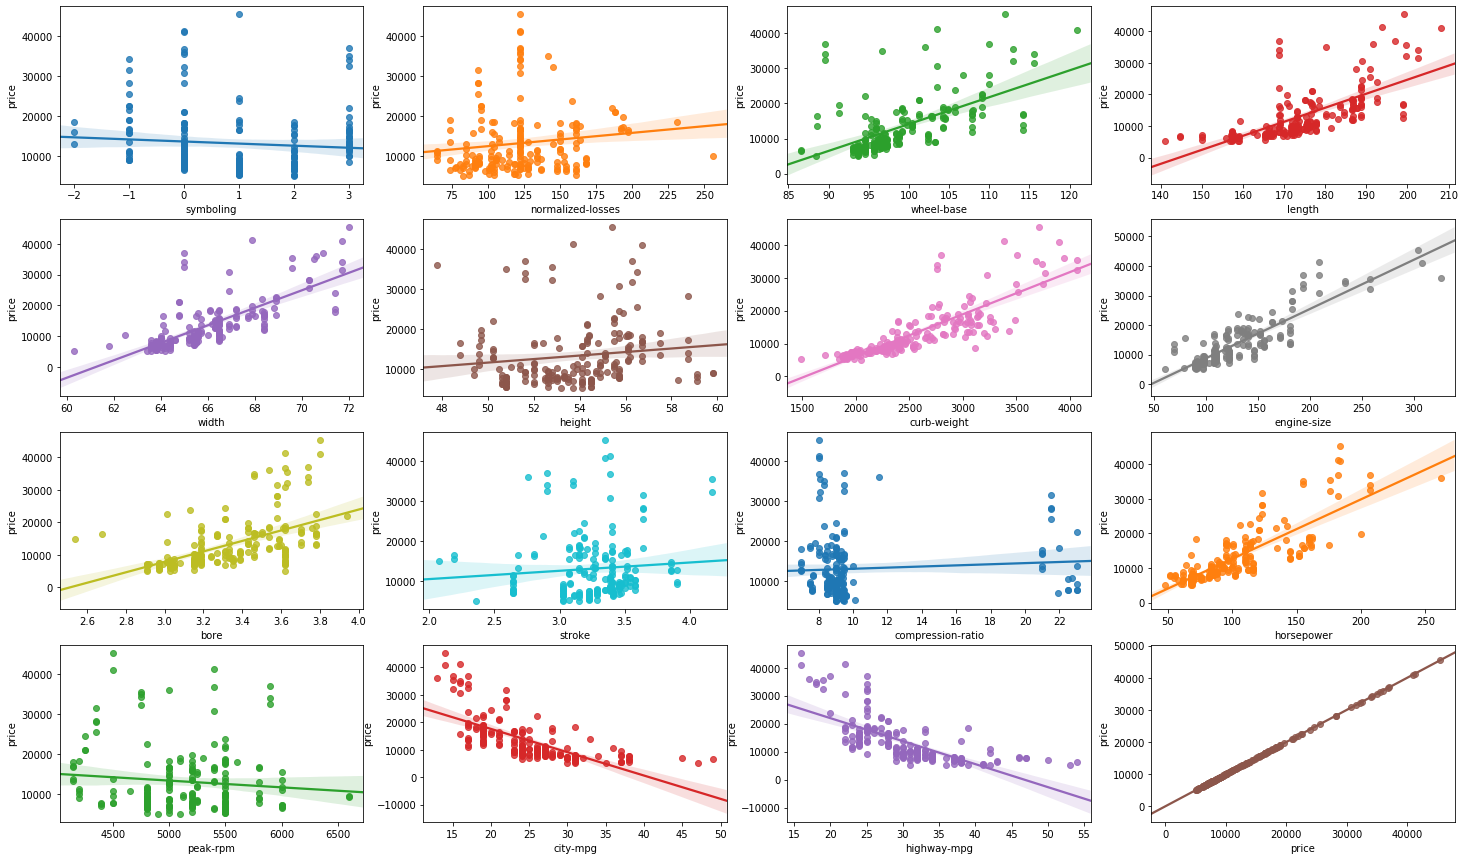

In [36]:
# Visulaize all correlations

col_dtypes = df.dtypes.tolist()
numeric_cols = [df.columns[idx] for idx, col_type in enumerate(col_dtypes) if col_type=='int64' or col_type=='float64']
df_numerics = df[numeric_cols]
f, axes = plt.subplots(4,4)
f.set_figheight(15)
f.set_figwidth(25)
col_idx = 0
for i in range(4):
    for j in range(4):
        x = numeric_cols[col_idx]
        sns.regplot(x, y="price", data=df_numerics, ax=axes[i][j])
        col_idx += 1
